# Raíces de ecuaciones
#####

La función principal de esta fórmula es determinar el Número de Mach de salida ($\mathbf{Me}$) del flujo a través de una tobera, como la de un motor de cohete. La ecuación $f(Me) = 0$ es una forma reordenada de la relación de presión isentrópica, un principio de la aerodinámica que vincula la expansión de presión ($\mathbf{P_e/P_o}$) con la velocidad del gas. Los métodos numéricos buscan la raíz de esta función para encontrar el valor exacto de $Me$ que corresponde a las condiciones de presión dadas, lo cual es esencial para calcular la velocidad de escape y el empuje del motor.
$$f(Me) = \frac{P_e}{P_o} - \left(1.0 + \frac{\gamma - 1}{2} Me^2\right)^{-\frac{\gamma}{\gamma - 1}}$$


In [367]:
import numpy as np
import matplotlib.pyplot as plt

#####
Las constantes utilizadas en el código provienen de datos de diseño y mediciones experimentales de un motor real.
 - Datos Experimentales: Los valores $\mathbf{P_o = 3.8\ \text{MPa}}$ es la presión total, que es medida en la cámara de combustión y $\mathbf{P_e = 0.08\ \text{MPa}}$ es la presión estática de salida, representan las condiciones específicas bajo las cuales está operando un motor de alto rendimiento. Estos valores son típicos de motores de cohete de gran empuje, y en un contexto real de la NASA (como el análisis de motores tipo SSME - Space Shuttle Main Engine), estos datos se obtendrían directamente de los sensores y pruebas de encendido, el motor que estamos analizando es un motor J-2 que utiliza oxigeno liquido e hidrogeno liquido como propelente,
 - Constante del Fluido: El valor de $\mathbf{\gamma = 1.25}$  es la relación de calores específicos, es una propiedad termodinámica que depende de la composición química y la temperatura de los gases de combustión. Para los productos de la combustión de propulsores de cohetes a temperaturas extremas, gamma es más bajo que el del aire frío, y este valor es un resultado directo del análisis químico y termodinámico de los propelentes utilizados por el motor en estudio.


In [368]:
#Definimos la funcion que queremos utilizar
def funcion(Me):
#Definimos las constantes de la ecuacuión
    gamma=1.25    #Relacion de calores especificos
    pe=0.08       #Mpa, Presion estatica de salida de la tobera
    po=3.8       #Mpa, Presion total de la camara de combustion

#Calculamos la funcion
    term = (1.0 + ((gamma - 1) / 2) * Me**2)
    f_me = (pe / po) - (term ** (-gamma / (gamma - 1)))
    return f_me

La fórmula de la velocidad de escape ($\mathbf{V_e}$) tiene como funcion traducir el Mach de salida ($\mathbf{Me}$) a una velocidad real, y se define como el producto del Número de Mach por la velocidad del sonido a la salida ($\mathbf{a_e}$):
$$V_e = Me \cdot a_e = Me \cdot \sqrt{\gamma \cdot R \cdot T_0}$$
El propósito es determinar qué tan rápido salen los gases, lo cual determina el empuje de un motor.
sus contantes son:
- $R$, es la constante especifica de gases, este relaciona la energía del gas con su temperatura, el cual, depende directamente del peso molecular promedio de los gases de combustión.
- $T_0$, es la temperatura estatica de salida, es la temperatura del gas justo cuando abandona la tobera, este valor es calculado y es menor que la temperatura de la cámara de combustión debido al enfriamiento por expansión.

In [369]:
def velocidad(Me):
    #Definimos las constantes de la ecuacuión
    gamma=1.25    #Relacion de calores especificos
    R = 350.0  # J/(kg·K), constante de los gases para el aire
    T0 = 3400.0  # K, temperatura total en la camara de combustion
    v= Me * (((gamma * R * T0)*(1+((gamma-1)/2)*(Me)**2 )**-1)** 0.5)
    return v

## Metodo grafico
#####
Se hace con el propósito de obtener una estimación visual inicial de la raíz de la ecuación, es decir, del valor del Número de Mach ($Me$) para el cual la función $f(Me)$ es cero. Se logra al graficar la función y observar dónde la curva intersecta el eje horizontal.
Este valor inicial es crucial, ya que permite seleccionar intervalos apropiados para los métodos cerrados (Bisección y Falsa Posición) y proporciona un punto de partida seguro para los métodos abiertos (Punto Fijo y Newton-Raphson), asegurando que las iteraciones converjan a la solución físicamente correcta y no a otra raíz o que diverjan.


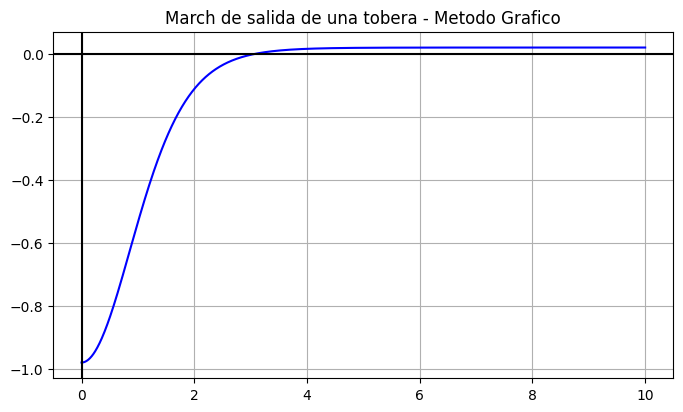

In [384]:
#En el eje x se encuentra Me, entonces definimos el rango de valores
Me = np.linspace(0, 10, 1000)   #significa que va de 0 a 10 utilizando 1000 puntos

#llamamos a la funcion para obtener los valores de y
f_me = funcion(Me)   #la funcion ya tiene las constantes definidas dentro

#Graficamos
plt.figure(figsize=(8, 4.5))                                  #Tamaño de la grafica
plt.plot(Me, f_me, label='f(Me)', color='blue')               #Graficamos la funcion
plt.axhline(0, color='black', linestyle='-', label='f(Me)')   #Linea horizontal en y=0
plt.axvline(0, color='black', linestyle='-', label='Me')      #Linea vertical en x=0
plt.title('March de salida de una tobera - Metodo Grafico')   #Titulo
plt.grid(True)                                                # activa la cuadrícula
plt.show()

Se crean los diccionarios, los cuales, posteriormente utilizaremos para graficar la comparacion error-iteracion de cada metodo

In [385]:
metodos = ["Bisección", "Falsa Posición", "Punto Fijo", "Newton-Raphson"]
errores= {}
iteraciones = {}
resultados= []

## Metodos cerrados
### Biseccion y posicion falsa
#####
tienen el propósito de garantizar la convergencia a la raíz. La Bisección logra esto al reducir el intervalo que contiene la raíz exactamente a la mitad en cada paso, siendo el método más robusto y lento. La Falsa Posición busca acelerar este proceso al trazar una línea secante entre los extremos del intervalo, y el punto donde cruza el eje x se convierte en la nueva estimación.

Ambos metodose fueron definidos como funcion los cuales tiene un paso a paso muy similar, pero con la diferencia que la forma de calcular la $p$ es la que marca la diferencia.

## Metodo de la biseccion
#####
Esta función encuentra la raíz reduciendo el intervalo $[\mathbf{a, b}]$ sistemáticamente.
1.	Evaluación Inicial: Calcula $f(a)$ y $f(b)$ para los límites del intervalo y verifica el cambio de signo.
2.	Bucle de Iteración: Inicia un bucle que se repite hasta alcanzar la tolerancia de error (es) o el límite de iteraciones (imax).
3.	Cálculo del Punto Medio: Calcula la nueva estimación de la raíz ($\mathbf{p}$) como el punto medio exacto del intervalo actual.
4.	Cálculo del Error: Calcula el error aproximado relativo ($\mathbf{e_a}$) en porcentaje, usando la fórmula $e_a = \left|\frac{p - p_{anterior}}{p}\right| \times 100\%$.
5.	Verificación de Parada: Comprueba si $\mathbf{e_a}$ es menor que $\mathbf{e_s}$. De ser así, guarda el resultado y finaliza el bucle.
6.	Actualización del Intervalo: Evalúa $f(p)$. Comprueba si el cambio de signo está en el subintervalo $[\mathbf{a, p}]$ o $[\mathbf{p, b}]$. Reemplaza el límite del intervalo ($\mathbf{a}$ o $\mathbf{b}$) por $\mathbf{p}$ para encerrar la raíz en un intervalo que es la mitad del anterior.


In [391]:
e_s=0.000001   # Error maximo permitido
N_it_max=1000   # Iteraciones maximas
e_a= 1         # Error inicial
N_it=0         # Cuanta las iteraciones
p=0            # Valor inicial de p

 #Definimos el intervalo donde se va a buscar la raiz
a=0   
b=10

#creamos la funcion biseccion
def biseccion(a, b, p,  e_s, e_a, N_it_max, N_it):
    error= []
    iteraciones= []
    fa=funcion(a)
    fb=funcion(b) 
    if fa*fb<0:                                   #comprobar el intervalo
        while (e_a>e_s) and (N_it<N_it_max):      #ciclo de error e iteraciones
            p_0=p
            p=(a+b)/2
            fp=funcion(p)
            #se mira en que subintervalo esta la raiz
            if fa*fp<0:                            
                b=p
                fb=funcion(b)
            elif fa*fp>0:
                a=p
                fa=funcion(a)
            else:
                N_it= N_it+1
                e_a=0
                break
            if p != 0:                            #calcular error relativo
                e_a = abs((p - p_0) / p)
                error.append(e_a)        #guarddar errores
            N_it= N_it + 1                        #contar iteraciones
            iteraciones.append(e_a)            #guardar iteraciones
    else:
        print("redefinir el intervalo")

    return p, N_it, e_a, error, iteraciones

#llamamos a la funcion biseccion
Me, N_it, e_a, err_list_b, iter_list_b= biseccion(a, b, p, e_s, e_a, N_it_max,N_it)
errores["biseccion"]= err_list_b
iteraciones["biseccion"]= iter_list_b
#calcular la velocidad de salida
ve=velocidad(Me)
resultados.append(('Bisección', Me, ve, iter_list_b, err_list_b))

#mostramos los resultados
if N_it>=N_it_max:
    print("Se alcanzo el numero maximo de iteraciones sin encontrar solucion")
elif e_a<=e_s:
    print("el valor de la raiz es" , Me)
    print("la velocidad de salida es de" , ve,"m/s")
    print("se realizaron", N_it , " iteraciones")
    print ("el error relativo aproximado es" , e_a)


el valor de la raiz es 3.052089214324951
la velocidad de salida es de 2530.208670164845 m/s
se realizaron 22  iteraciones
el error relativo aproximado es 7.811651703447829e-07


## Metodo de la posicion falsa
#####
Esta función utiliza una línea recta para estimar la raíz de forma más rápida que la bisección.
1.	Evaluación Inicial y Bucle: Similar a la Bisección, verifica los límites iniciales y comienza el bucle iterativo.
2.	Cálculo de la Nueva Aproximación: Utiliza la fórmula de la Falsa Posición (basada en la interpolación lineal) para calcular la nueva aproximación ($\mathbf{p}$). Esta $\mathbf{p}$ es la intersección con el eje x de la línea recta que conecta $(\mathbf{a, f(a)})$ con $(\mathbf{b, f(b)})$.
3.	Cálculo del Error y Parada: Mismo proceso que la Bisección: calcula el error aproximado relativo y detiene el bucle si el error es menor que $\mathbf{e_s}$.
4.	Actualización del Intervalo: Evalúa $f(p)$. Reemplaza el límite del intervalo ($\mathbf{a}$ o $\mathbf{b}$) por $\mathbf{p}$ según el cambio de signo, asegurando que el nuevo intervalo siga conteniendo la raíz.



In [396]:
e_s=0.000001   # Error maximo permitido
N_it_max=1000   # Iteraciones maximas
e_a= 1         # Error inicial
N_it=0         # Cuanta las iteraciones
p=0            # Valor inicial de p

 #Definimos el intervalo donde se va a buscar la raiz
a=0   
b=10

# Creamos la funcion de posicion falsa
def posicion_falsa(a, b, p,  e_s, e_a, N_it_max, N_it):
    error= []
    iteraciones= []
    fa=funcion(a)
    fb=funcion(b) 
    if fa*fb<0:                                   # Comprobar el intervalo
        while (e_a>e_s) and (N_it<N_it_max):      # Ciclo de error e iteraciones
            p_0=p
            p=b - ((fb * (a - b)) / (fa - fb))
            fp=funcion(p)
            if fa*fp<0:                           # Se mira en que subintervalo esta la raiz
                b=p
                fb=funcion(b)
            elif fa*fp>0:
                a=p
                fa=funcion(a)
            else:
                N_it= N_it+1
                e_a=0
                break
            if p != 0:                             # Calcular error
                e_a = abs((p - p_0) / p)
                error.append(e_a)                  # Guarddar errores
            N_it= N_it + 1                         # Contar iteraciones
            iteraciones.append(e_a)                # Guardar iteraciones
    else:
        print("redefinir el intervalo")
    return p, N_it, e_a, error, iteraciones

# llamamos a la funcion posicion falsa
Me, N_it, e_a, err_list_fp, iter_list_fp= posicion_falsa(a, b, p, e_s, e_a, N_it_max,N_it)
errores["falsa posicion"]= err_list_fp
iteraciones["falsa posicion"]= iter_list_fp
#calcular la velocidad de salida
ve=velocidad(Me)
resultados.append(('Falsa Posición', Me, ve, iter_list_fp, err_list_fp))

# Mostramos los resultados
if N_it>=N_it_max:
    print("Se alcanzo el numero maximo de iteraciones sin encontrar solucion")
elif e_a<=e_s:
    print("el valor de la raiz es" , Me)
    print("la velocidad de salida es de" , ve,"m/s")
    print("se realizaron", N_it , " iteraciones")
    print ("el error relativo aproximado es" , e_a)

el valor de la raiz es 3.0521099632102975
la velocidad de salida es de 2530.216617339548 m/s
se realizaron 137  iteraciones
el error relativo aproximado es 8.95451167087273e-07


## Metodos abiertos
### Punto fijo y Newton-Raphson
#####
Estos tienen el propósito de encontrar la raíz con la mayor eficiencia y velocidad de convergencia. El Punto Fijo logra esto mediante una simple iteración $Me_{i+1} = g(Me_i)$, y su propósito es demostrar la convergencia o divergencia de la solución en función dependiendo de como se reordene la ecuación. El Método de Newton-Raphson es el más sofisticado, tiene el propósito de alcanzar una convergencia cuadrática al utilizar la derivada ($f'(Me)$) para calcular la línea tangente en el punto de estimación, logrando la mayor velocidad de cálculo a costa de una mayor susceptibilidad a errores si la estimación inicial es pobre.

## Metodo de Punto fijo
#####
Esta función encuentra la raíz mediante una fórmula de recurrencia.
1.	Bucle de Iteración: Inicia el bucle desde la suposición inicial $\mathbf{Me_0}$.
2.	Cálculo de la Nueva Aproximación: Calcula la siguiente estimación ($\mathbf{Me_1}$) utilizando la formulación de punto fijo, con la siguiente forma: $\mathbf{Me_{1} = Me_{0} - f(Me_{0})}$.
3.	Cálculo de Error: Calcula el error aproximado relativo comparando la nueva aproximación ($\mathbf{Me_1}$) con la anterior ($\mathbf{Me_0}$).
4.	Actualización y Parada: Si el error es menor que $\mathbf{e_s}$, finaliza. De lo contrario, $\mathbf{Me_1}$ se convierte en $\mathbf{Me_0}$ para la siguiente iteración.


In [397]:
e_s=0.000001   # Error maximo permitido
N_it_max=1000  # Iteraciones maximas
e_a= 1         # Error inicial
N_it=0         # Cuanta las iteraciones


# Creamos la función de punto fijo
def punto_fijo(e_s, e_a, N_it_max, N_it):
    error= []
    iteraciones= []
    #punto inicial
    Me0 = 4.0
    while (e_a > e_s) and (N_it < N_it_max):
        Me1 = Me0 - (funcion)(Me0)    # Actualizamos el valor de Me utilizando la función n_funcion
        e_a =abs((Me1 - Me0) / Me1)           # Calculamos el error aproximado
        error.append(e_a)              
        Me0 = Me1                          # Actualizamos el valor para la siguiente iteración
        N_it += 1                          # Contador de iteraciones
        iteraciones.append(e_a)            # Guardar iteraciones
    return Me0, N_it, e_a, error, iteraciones

# llamamos a la función de punto fijo
Me, N_it, e_a, err_list_pf, iter_list_pf = punto_fijo(e_s, e_a, N_it_max, N_it)
errores["punto fijo"]= err_list_pf
iteraciones["punto fijo"]= iter_list_pf
# Calculamos la velocidad de salida
ve = velocidad(Me)
resultados.append(('Punto Fijo', Me, ve, iter_list_pf, err_list_pf))

# Mostramos los resultados
if N_it >= N_it_max:
    print("No se encontró solución en el número máximo de iteraciones")
elif e_a <= e_s:
    print("el valor de la raiz es" , Me)
    print("la velocidad de salida es de" , ve,"m/s")
    print("se realizaron", N_it , " iteraciones")
    print ("el error relativo aproximado es" , e_a)

el valor de la raiz es 3.052167424972512
la velocidad de salida es de 2530.238625713127 m/s
se realizaron 275  iteraciones
el error relativo aproximado es 9.892481894068771e-07


## Metodo de Newton-Raphson
#####
Esta función usa la pendiente de la función para acelerar drásticamente la búsqueda de la raíz.
1.	Inicialización: Fija la suposición inicial $\mathbf{Me_0}$, en este caso utilizamos $\mathbf{Me_0 = 4.0}$
2.	Bucle de Iteración: Inicia el bucle.
3.	Cálculo de la Derivada: Llama a la función auxiliar derivada_funcion(Me) para obtener la pendiente ($\mathbf{f'(Me_0)}$) en el punto actual, $\mathbf{Me_0}$, ademas, se calcula por medio del metodo de la secante.
4.	Cálculo de la Nueva Aproximación: Aplica la fórmula de Newton-Raphson: $\mathbf{Me_{1} = Me_{0} - f(Me_{0}) / f'(Me_{0})}$. Esto equivale a encontrar dónde la línea tangente en $\mathbf{Me_0}$ cruza el eje x, se asegura que la derivada no sea cero para que no se presenten errores en las iteraciones.
5.	Cálculo de Error: Calcula el error aproximado relativo comparando la nueva aproximación ($\mathbf{Me_1}$) con la anterior ($\mathbf{Me_0}$).
6.	Actualización y Parada: Si el error es menor que $\mathbf{e_s}$, finaliza. De lo contrario, $\mathbf{Me_1}$ se convierte en $\mathbf{Me_0}$ para la siguiente iteración.


In [402]:
e_s=0.000001   # Error maximo permitido
N_it_max=1000   # Iteraciones maximas
e_a= 1         # Error inicial
N_it=0         # Cuanta las iteraciones

# Creamos la funcion de la derivada de la función
def derivada_funcion(Me):
    # Calculamos la derivada de la función usando el metodo de la secante
    h = 0.001*(Me)  # Paso para la aproximación
    derivada= (funcion(Me + h) - funcion(Me - h)) / (2 * h)
    return derivada

# Creamos la función de Newton-Raphson
def newton_raphson(e_s, e_a, N_it_max, N_it):
    error=[]
    iteraciones=[]
    Me0 = 4.0                                                        # Valor inicial
    while (e_a > e_s) and (N_it < N_it_max):
        f_Me0 = funcion(Me0)
        f_prime_Me0 = derivada_funcion(Me0)
        if f_prime_Me0 == 0:                                         # Evitar dividir por cero
            print("Derivada cero, no se puede realizar el metodo")
            break
        Me1 = Me0 - f_Me0 / f_prime_Me0                              # Actualizamos el valor de Me utilizando Newton-Raphson
        e_a = abs((Me1 - Me0) / Me1)                                 # Calculamos el error aproximado 
        error.append(e_a)                                            # Guarddar errores
        Me0 = Me1                                                    # Actualizamos el valor para la siguiente iteración
        N_it += 1                                                    # Contador de iteraciones
        iteraciones.append(e_a)                                      # Guardar iteraciones
    return Me0, N_it, e_a, error, iteraciones

# llamamos a la función de Newton-Raphson
Me1, N_it, e_a, err_list_nr, iter_list_nr= newton_raphson(e_s, e_a, N_it_max, N_it)
errores["newton raphson"]= err_list_nr
iteraciones["newton raphson"]= iter_list_nr
# Calculamos la velocidad de salida
ve = velocidad(Me1)
resultados.append(('Newton-Raphson', Me1, ve, iter_list_nr, err_list_nr))

# Mostramos los resultados
if N_it >= N_it_max:
    print("Se alcanzo el numero maximo de iteraciones sin encontrar solucion")
elif e_a <= e_s:
    print("el valor de la raiz es" , Me1)
    print("la velocidad de salida es de" , ve,"m/s")
    print("se realizaron", N_it , " iteraciones")
    print ("el error relativo aproximado es" , e_a)

el valor de la raiz es 3.052089073199264
la velocidad de salida es de 2530.208616111017 m/s
se realizaron 8  iteraciones
el error relativo aproximado es 8.665464286769118e-09


## Explicacion de los diccionarios
#####
Diccionario {errores}
Es la estructura principal que almacena el historial de convergencia de cada método, tiene el proposito de almacenar el listado completo de errores aproximados ($\mathbf{e_a}$) generados en cada iteración de un método.
- Estructura:Clave (Key): El nombre del método como una cadena de texto (ej., 'Biseccion', 'Newton-Raphson').
- Valor (Value): Una lista que contiene todos los valores del error aproximado ($\mathbf{e_a}$) calculados desde la primera iteración hasta la última.
- Función en el Gráfico: Cuando el código genera la gráfica:Toma la clave (el nombre) para usarla como etiqueta de la línea (label=metodo).Toma la lista de valores para graficarlos directamente en el Eje Y (Error aproximado) contra el índice de la lista (que se convierte en el Eje X, Número de Iteraciones).

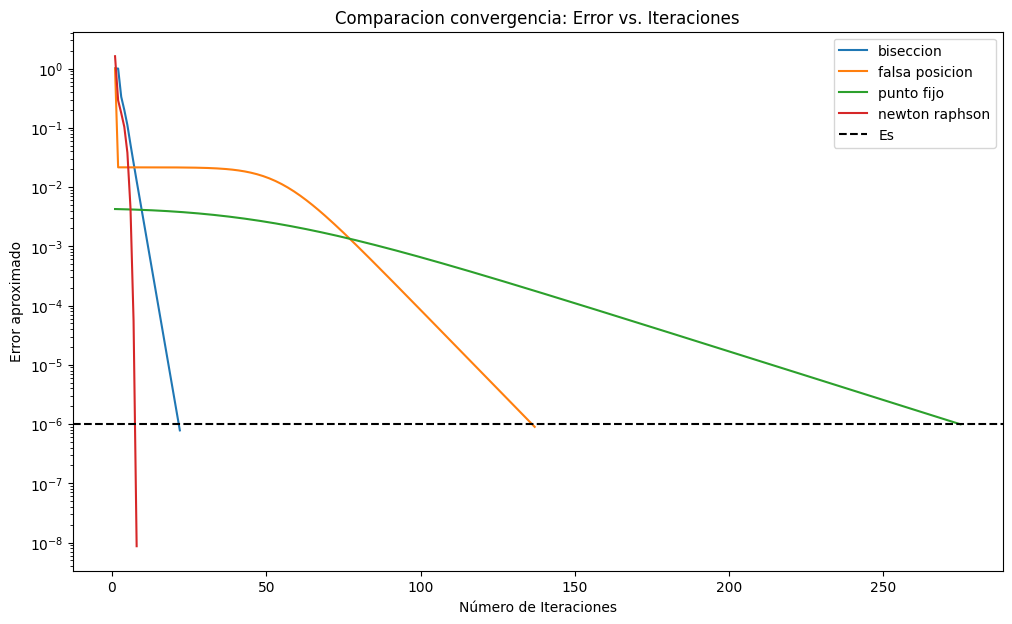

In [404]:
plt.figure(figsize=(12, 7))

# Iteramos sobre el diccionario de errores
for metodo, lista_errores in errores.items():
    
    # Creamos el eje x, con las iteraciones
    iter_count = range(1, len(lista_errores) + 1)

    plt.plot(iter_count, lista_errores, label=metodo)

# Añadimos la línea horizontal del error esperado
plt.axhline(y=0.000001, color='Black', linestyle='--', label='Es')

plt.xlabel('Número de Iteraciones')
plt.ylabel('Error aproximado')
plt.title('Comparacion convergencia: Error vs. Iteraciones')
plt.legend()

# Usamos escala logarítmica en el eje Y para ver mejor la caída del error
plt.yscale('log') 

plt.show()

# Concluciones
#####
1. Logramos determinar con éxito el Número de Mach de salida ($\mathbf{Me}$) y la velocidad de escape ($\mathbf{V_e}$) para una tobera de cohete, por medio de métodos numéricos, se resolvió la ecuación de Relación de Presión Isentrópica para encontrar el valor de $\mathbf{Me}$ que equilibra las condiciones del motor (con $\mathbf{\gamma = 1.25}$). Este $\mathbf{Me}$ se usó para calcular la $\mathbf{V_e}$, el parámetro fundamental que define el empuje del cohete. Los resultados que octuvimos fueron valores cercanos a : $$M_e = 3.0520$$ $$V_e = 2530.2086 m/s$$
2. El estudio permitio demostrar la eficiencia de cada método. El Método de Newton-Raphson probó ser el más eficiente, alcanzando el menor error en el menor número de iteraciones gracias a su convergencia cuadrática, que duplica las cifras correctas en cada paso al usar la derivada de la función. Este es el estándar para la ingeniería que requiere soluciones rápidas y precisas. Por otro lado, los métodos cerrados (Bisección y Falsa Posición) aunque más lentos, proporcionaron una solución garantizada y robusta. La Falsa Posición, al interpolar la línea secante, superó la velocidad de la Bisección, cuya convergencia lineal es la más lenta, pero la más predecible. Finalmente, el Método de Punto Fijo sirvió como ejercicio conceptual, cuya velocidad de convergencia depende altamente de la formulación elegida para la función de iteración.